### This is an interactive notebook, please clone the repo, run the code, break it, fix it, learn. 

In [1]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

# Thinking about space. 

If we had a point in 2D space, we can represent it as (x,y). 
We also know that if we had two points, $A = (0,1)$ and $B =(0,10)$.

We know that B is above A. 

# Lines 
The general equation of a line is:
$$ Ax + By + c = 0 $$
We define a line by making a relationship between x and y. When we are plotting this line, we are really asking what points satisfy this reletion. 

We can also rearrange the equation to get a $ y = f(x) $ or an $ x = f(y)$  . 

Rearranging this equation to $ y = f(x) $, allows us to ask a different question. For the line (the reletionship) we have defined in the reletionship/function $ f(x) $, we can give an $ x $ and get the $ y $ that fits this reletionship. 

$$ y = ax + b $$

In [2]:
# Lets make one of these functions which takes in an X and gives us the Y that the X maps to. 
def straight_line(a,x,b):
    y = a*x +b 
    return y

Now we have our equation in the form of $ y = f(x) $, we can see how it works. Use the sliders to change the parameters below and see what happens. 

<IPython.core.display.Javascript object>


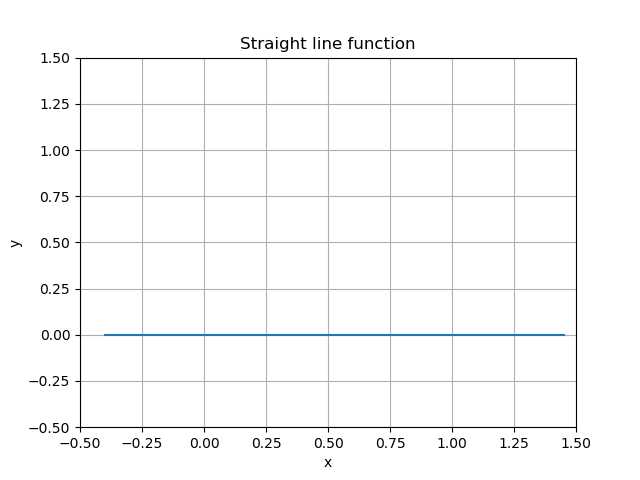

interactive(children=(FloatSlider(value=0.0, description='a', max=3.0, min=-3.0), FloatSlider(value=0.0, descr…

In [3]:
# Plotting a line in 2D space. 
x = np.arange(-0.4, 1.5, .05)
sigma_fn = np.vectorize(straight_line)
sigma = sigma_fn(1,x,0)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line, = ax.plot(x, sigma)

ax.set_ylim([-0.5, 1.5])
ax.set_xlim([-0.5,1.5])
ax.grid(True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Straight line function')

def update(a = 1.0, b = 1.0):
    line.set_ydata(sigma_fn(a,x,b))
    fig.canvas.draw_idle()

slow = interactive(update,a=FloatSlider(min=-3, max=3, step=0.1), b =FloatSlider(min=-3, max=3, step=0.1));
fig.show()
slow

$$ y = ax + b $$
Theres a few important things we can learn from playing with the above:
* Increasing $a$ gives us a higher gradient (slope).
* We can change the direction of our slope by making a negative. 
* Changing $b$ will move this slope around in space. 
* No matter what we do, the line remains straight (linear).

Lets say we had two points and we wanted to know if they are above or below our line. 

<IPython.core.display.Javascript object>


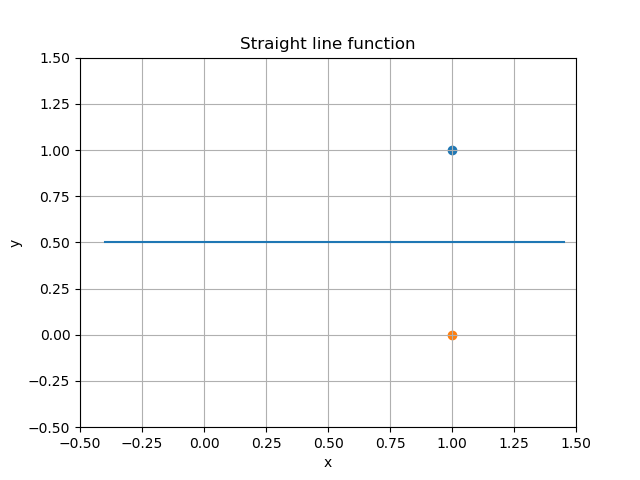

In [4]:
# Plotting a line in 2D space, with our two points 
x = np.arange(-0.4, 1.5, .05)
sigma_fn = np.vectorize(straight_line)
sigma = sigma_fn(0,x,0.5)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line, = ax.plot(x, sigma)

# Plot the two points
ax.scatter(1,1) # The blue point
ax.scatter(1,0) # The orange point


ax.set_ylim([-0.5, 1.5])
ax.set_xlim([-0.5,1.5])
ax.grid(True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Straight line function')

fig.show()


The equation of the line above is $ y = 0x + 0.5 $
The form of a line is $ Ax + By + c = 0 $

If we rearrange $ y = 0x + 0.5 $ we can get our line into the other form:  $ y - 0.5 = 0 $.  
This equation asking to plot all the points where the y coordinate minus 0.5 is 0. 

We know our points do not belong on this line because, their y coordinate is not 0.5.

The blue point has the y coordinate of 1. $ 1 - 0.5  = 0.5 $, which is more than 0, so we are above the line. 

The orange point has the y coordinate of 0. $ 0 - 0.5  = -0.5 $ which is less than 0, so we are below the line.  

So our new equation of a line $ Ax + By + c = 0 $ is quite useful to *classify* if a point is on either side of a line. 

# Looking at some more interesting data
Note this is a 2D plot. 

<IPython.core.display.Javascript object>


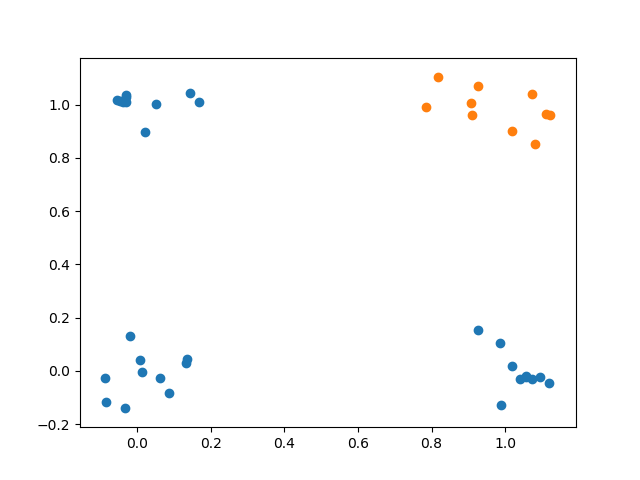

In [5]:
plt.figure(0)
mu, sigma = 0, 0.07 # mean and standard deviation

zero_x = np.random.normal(0, sigma, 10)
zero_y = np.random.normal(0, sigma, 10)

one_x = np.random.normal(0, sigma, 10)
one_y = np.random.normal(1, sigma, 10)

two_x = np.random.normal(1, sigma, 10)
two_y = np.random.normal(0, sigma, 10)

three_x = np.random.normal(1, sigma, 10)
three_y = np.random.normal(1, sigma, 10)


# Making a NAND classification 
negative_x = np.concatenate((zero_x, one_x, two_x))
negative_y = np.concatenate((zero_y, one_y, two_y))

positive_x = three_x
positive_y = three_y

plt.scatter(negative_x, negative_y)
plt.scatter(positive_x, positive_y)

plt.show()

# An objective 
So our job is to find a function which takes in too points and labels it into the correct class, either blue or orange. 

We have no idea where to start so lets pick the simplest kind of function, a linear one.   
We remember that a linear equation of a straight line is: 
$ y = ax + b $  
Lets try and move it around and think about what we can do with it. 

<IPython.core.display.Javascript object>


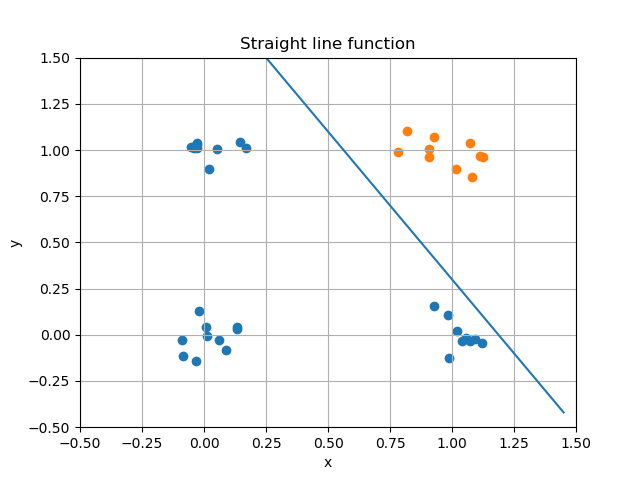

interactive(children=(FloatSlider(value=0.0, description='w', max=3.0, min=-3.0), FloatSlider(value=0.0, descr…

In [6]:
# Plotting the output of a hidden neuron 
x = np.arange(-0.4, 1.5, .05)
sigma_fn = np.vectorize(straight_line)
sigma = sigma_fn(1,x,1)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line, = ax.plot(x, sigma)

# Our data labelled with the correct colour class 
plt.scatter(negative_x, negative_y)
plt.scatter(positive_x, positive_y)

ax.set_ylim([-0.5, 1.5])
ax.set_xlim([-0.5,1.5])
ax.grid(True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Straight line function')

def update(w = 1.0, b = 1.0):
    line.set_ydata(sigma_fn(x,w,b))
    fig.canvas.draw_idle()

slow = interactive(update,w=FloatSlider(min=-3, max=3, step=0.1), b =FloatSlider(min=-3, max=3, step=0.1));
fig.show()
slow

We can move the line such that it splits the classes up and seperates the blue points from the orange. We need someway to make this useful...

The line I picked is $ y = -1.6x + 1.9 $, feel free to use your own. 

<IPython.core.display.Javascript object>


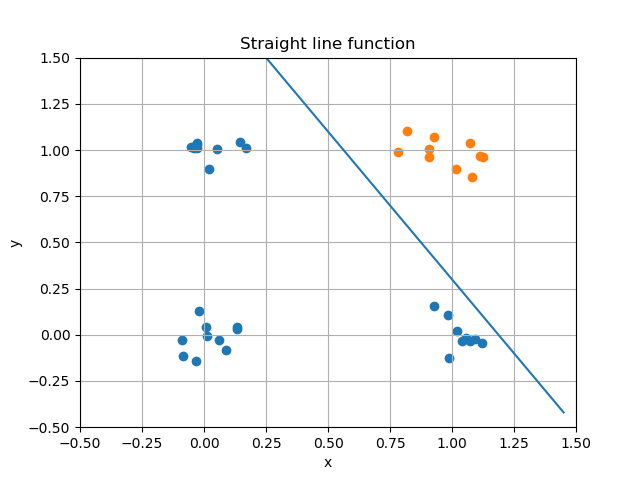

Text(0.5, 1.0, 'Straight line function')

In [7]:
our_a = -1.6
our_b = 1.9

# Plotting the line I picked to seperate our data
x = np.arange(-0.4, 1.5, .05)
sigma_fn = np.vectorize(straight_line)
sigma = sigma_fn(our_a,x,our_b)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line, = ax.plot(x, sigma)

# Our data labelled with the correct colour class 
plt.scatter(negative_x, negative_y)
plt.scatter(positive_x, positive_y)


ax.set_ylim([-0.5, 1.5])
ax.set_xlim([-0.5,1.5])
ax.grid(True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Straight line function')

# Running out of ideas...
The line we have picked looks like a possible decision boundary in the form:
$ y = ax + b $,

$$ y = -1.6x + 1.9 $$

Remember from before, we can tell which side of the line a point is on by rearranging the equation of our line into the form $ Ax + By + c = 0 $.

In the earlier example, if $ Ax + By + c $ was positive for some point $(x,y)$, then it would be on the other side of the line than if $ Ax + By + c $ was negative. 

As our 2D data is separated by one line, the data has a property we call linear separability. 

So lets take some points, either side of our decision boundary and see what we get. 

Note to get our equation into the right form, we need to rearrange:
$$ 1.6x + y - 1.9 = 0 $$

In [8]:
def line(a,x,b,y,c):
    # A function of a line in our preferred form. 
    l = a*x + b*y + c 
    return l
sigma_fn = np.vectorize(line)

Remember that negative are all the blue points and positive are all our orange points.

In [9]:
sigma_fn(-our_a,negative_x, 1, negative_y,-our_b)

array([-1.88221295, -1.82920448, -2.09201025, -1.8452008 , -1.64044564,
       -2.06580612, -1.65550861, -1.80011089, -1.84472793, -2.14868874,
       -0.95814686, -0.62721613, -0.62172048, -0.95164985, -0.90949181,
       -0.93934169, -0.92072957, -0.96763874, -0.97026139, -0.81230581,
       -0.23500951, -0.22785058, -0.25106642, -0.17180794, -0.26576989,
       -0.26533458, -0.15331387, -0.21451984, -0.21767162, -0.44518133])

In [10]:
# Lets try our orange points
sigma_fn(-our_a,positive_y,1,positive_y,-our_b)

array([0.67460436, 0.31465565, 0.59641719, 0.96639482, 0.71938054,
       0.4379998 , 0.60004636, 0.60878834, 0.79975575, 0.87806389])

# It worked!
All the ones on the left of the line are negative.  
All the ones on the right are positive. 

So to make a classifier, we can just say if the answer to this function is positive, predict orange, otherwise predict blue. 

In [11]:
def predict(x,y):
    a = sigma_fn(-our_a,x,1,y,-our_b)
    if (a > 0):
        return "Orange"
    else:
        return "Blue"

Lets pick the point $x = 1, y = 1$ and test it out:

In [12]:
predict(1,1)

'Orange'

So now we have a way of classifying things into the 2 classes of each side of the line. (Ignoring on the line).   
What can we do with this?

# Solving NAND

![NAND Gate](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Faccendoreliability.com%2Fwp-content%2Fuploads%2F2017%2F07%2FLogic-gate-nand-us.png&f=1&nofb=1)

A NAND gate is a fundamental logic gate in computing. 
They have the following properties, given inputs A, B they output Y. 

|A|B|Y|
|-|-|-|
|0|0|1|
|0|1|1|
|1|0|1|
|1|1|0|

It turns out that if you have enough NAND gates you could build a whole computer, from the ALU (Arithmetic and Logic Unit) to the storage (Flip Flops), so if we can make a binary classifier that replicates a NAND, we know we have found a good building block that might suggest these perceptrons are useful. 

In [13]:
# Trying some more points:
print(predict(0,0))
print(predict(0,1))
print(predict(1,0))
print(predict(1,1))

Blue
Blue
Blue
Orange


It turns out we used our line to solve NAND, that wasn't too hard.  


# What does this have to do with perceptrons? 

![Perceptron](https://miro.medium.com/max/2586/1*8zQW3SanV2FQr5iYPY-2Gg.png)

A perceptron is when you take in an input, multiply it by a weight, sum them and then add a bias term. Mathematically this looks like: $$ y = x_1 * \theta_1 + x_2 * \theta_2 + b $$
If $ y > 0 $ predict $1$, else $0$.

Well remember the equation from earlier:
 $$ A x + B y + C = p $$ 
If $ p > 0 $ predict $1$, else $0$.

If we change the names of our inputs, from $x$ and $y$ to $x_1$ and $x_2$, change $A$ to $\theta_1$ and $B$ to $\theta_2$ we get:

$$ y = x_1 * \theta_1 + x_2 * \theta_2 + b $$

It's the equation of a line, we just made earlier. 
Oh wait, we just invented feedforward for perceptrons. 

*Image of a perceptron was stolen from [here](https://www.google.com/url?sa=i&url=https%3A%2F%2Ftowardsdatascience.com%2Fperceptron-algorithms-for-linear-classification-e1bb3dcc7602&psig=AOvVaw1kp9hsTLLWso1pLJERSszr&ust=1585841157974000&source=images&cd=vfe&ved=0CAkQjhxqFwoTCNiar-nEx-gCFQAAAAAdAAAAABAE).*

## Lets try it with code:

In [14]:
def hidden_XY(x,y,w_x, w_y,b):
    out = w_x*x + w_y*y + b
    return out

def perceptron(x,y,w_x, w_y,b):
    o = hidden_XY(x,y,w_x, w_y,b)
    if (o > 0):
        return "Orange"
    else:
        return "Blue"

multi_percpt = np.vectorize(perceptron)
multi_hidden = np.vectorize(hidden_XY)

In [15]:
multi_hidden(negative_x,negative_y,1, 1.6,-1.9)

array([-1.89339651, -1.88321385, -2.15658872, -1.82458567, -1.69513518,
       -2.02864268, -1.71770397, -1.70949472, -1.94778604, -2.16796586,
       -0.32174979, -0.08817452, -0.11616463, -0.32182053, -0.27052822,
       -0.31656531, -0.28618015, -0.32416815, -0.44538555, -0.24189515,
       -0.88294925, -0.87342122, -0.85023382, -0.84104939, -0.9092391 ,
       -0.72832133, -0.85213808, -0.87733292, -0.7461235 , -1.11456974])

In [16]:
multi_hidden(positive_x,positive_y,1, 1.6,-1.9)

array([0.46817816, 0.54489289, 0.54535306, 0.68062947, 0.62026485,
       0.55641779, 0.76159876, 0.75487852, 0.83435327, 0.73562688])

In [17]:
print(perceptron(0,0,1, 1.6,-1.9))
print(perceptron(0,1,1, 1.6,-1.9))
print(perceptron(1,0,1, 1.6,-1.9))
print(perceptron(1,1,1, 1.6,-1.9))

Blue
Blue
Blue
Orange


You can see they are equivalent, the only difference is the variable names. 

|A|B|Y|
|-|-|-|
|0|0|1|
|0|1|1|
|1|0|1|
|1|1|0|

$$ y = \sigma(wx+b) $$

## An important point to stop and think about what we have done. 

We have just derived the fundamental building block for neural networks from scratch, and it didn't require any really advanced maths. However, we now have to prove that they are useful and also find a way to train them. 

## What happens if we use more than one line?
[Tensorflow playground.](https://playground.tensorflow.org)

* An interactive example of showing how using multiple of these lines can help us classify points in many different distributions.   

## Some intuition behind a usefulness proof:
![Circle](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRAEEDUPp7NyPC2OqeIHmK8_sb9QC-kJdHVBBqtnWQG2qxepfpx&usqp=CAU)
Notice on the circle example that we are overlapping and moving around many different lines to make a quite complex decision boundry. 

This is one way of explaning something called Universal Approximation theory. The word approximation here is important, notice how the more neurons/lines we build on top of eachother we get close and closer to something looking line a circle. 

The truth is you would need an infinite amount of tangent lines to generate a circle, but we can approximate a circle using a finite number of lines. 

# Link to Next Notebook. 
## Explaning Universal Function approximation and the use of the sigmoid function. 

http://localhost:8888/notebooks/FastAI/Lesson3/Universal%20Approximation%20Theory.ipynb


# An alternate way of looking at perceptrons. (Linear Algebra)

For any number of inputs you may have seen an equation for a perceptron looking like this: 

$$ y = \sigma(Wx + b) $$ 
Where $w$ is a weight matrix (rotates a line).     
$ x $ is your input vector.   
$ y $ is your output vector.    
$ x $ is your bias vector (moves/shifts the line around). 

This is using an operation called a dot product, $Wx$, between a vector (the weights of our perceptron) and another vector (our inputs). 

A dot product is usually done between matrices and vectors, you can see what this looks like here:
[Matrix Visualiser.](https://shad.io/MatVis/) 

A dot product between a metrix and a vector is doing a projection. It projects 2d space to a line. If you set the bottom components of the matrix to zeros, you can see what this looks like. 

Visualising Linear Transformations:
https://www.khanacademy.org/math/linear-algebra/matrix-transformations/linear-transformations/a/visualizing-linear-transformations

### Other sources:
https://medium.com/@thomascountz/calculate-the-decision-boundary-of-a-single-perceptron-visualizing-linear-separability-c4d77099ef38

https://brilliant.org/wiki/perceptron/

https://cs.stanford.edu/people/eroberts/courses/soco/projects/neural-networks/Neuron/index.html

# Can we solve other gates:
NAND is just one type of logic gate, it turns out there are many. 
XOR is another type of gate that has these properties:

|A|B|Y|
|-|-|-|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

In [18]:
plt.figure(3)
mu, sigma = 0, 0.1 # mean and standard deviation

zero_x = np.random.normal(0, sigma, 10)
zero_y = np.random.normal(0, sigma, 10)

one_x = np.random.normal(0, sigma, 10)
one_y = np.random.normal(1, sigma, 10)

two_x = np.random.normal(1, sigma, 10)
two_y = np.random.normal(0, sigma, 10)

three_x = np.random.normal(1, sigma, 10)
three_y = np.random.normal(1, sigma, 10)


# Making an XOR classification 
positive_x = np.concatenate((one_x, two_x))
positive_y = np.concatenate((one_y, two_y))

negative_x = np.concatenate((zero_x, three_x))
negative_y = np.concatenate((zero_y, three_y))

plt.scatter(positive_x, positive_y)
plt.scatter(negative_x, negative_y)

plt.show()

<IPython.core.display.Javascript object>


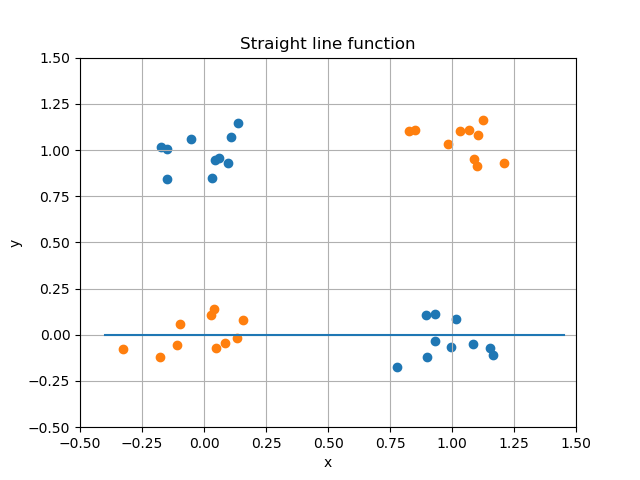

interactive(children=(FloatSlider(value=0.0, description='a', max=3.0, min=-3.0), FloatSlider(value=0.0, descr…

In [19]:
# Plotting the output of a hidden neuron 
x = np.arange(-0.4, 1.5, .05)
sigma_fn = np.vectorize(straight_line)
sigma = sigma_fn(1,x,1)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line, = ax.plot(x, sigma)

# Our data labelled with the correct colour class 
plt.scatter(positive_x, positive_y)
plt.scatter(negative_x, negative_y)

ax.set_ylim([-0.5, 1.5])
ax.set_xlim([-0.5,1.5])
ax.grid(True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Straight line function')

def update(a = 1.0, b = 1.0):
    line.set_ydata(sigma_fn(a,x,b))
    fig.canvas.draw_idle()

slow = interactive(update,a=FloatSlider(min=-3, max=3, step=0.1), b =FloatSlider(min=-3, max=3, step=0.1));
fig.show()
slow

<IPython.core.display.Javascript object>


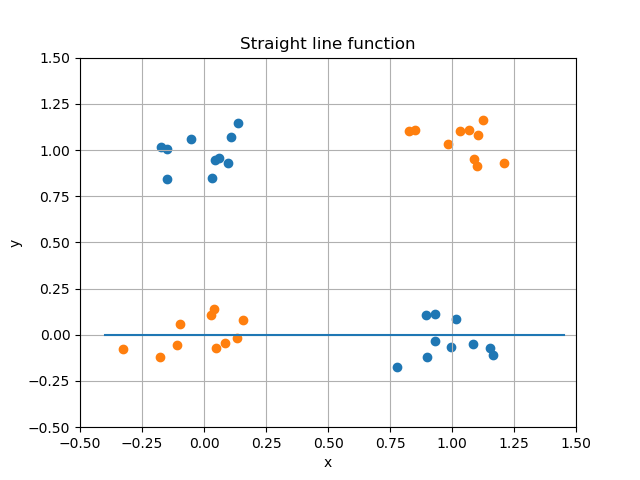

interactive(children=(FloatSlider(value=0.0, description='a', max=3.0, min=-3.0), FloatSlider(value=0.0, descr…

In [20]:
# Plotting the output of a hidden neuron 
x = np.arange(-0.4, 1.5, .05)
sigma_fn = np.vectorize(straight_line)
sigma = sigma_fn(1,x,1)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line, = ax.plot(x, sigma)

# Our data labelled with the correct colour class 
plt.scatter(positive_x, positive_y)
plt.scatter(negative_x, negative_y)

ax.set_ylim([-0.5, 1.5])
ax.set_xlim([-0.5,1.5])
ax.grid(True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Straight line function')

def update(a = 1.0, b = 1.0):
    line.set_ydata(sigma_fn(a,x,b))
    fig.canvas.draw_idle()

slow = interactive(update,a=FloatSlider(min=-3, max=3, step=0.1), b =FloatSlider(min=-3, max=3, step=0.1));
fig.show()
slow

It is clear we are going to need more than one line. XOR needs two lines (neurons) to classify. 

## To be continued... 